In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import MiniBatchKMeans
%matplotlib inline

In [3]:
df = pd.read_csv("https://raw.githubusercontent.com/Thinkful-Ed/data-201-resources/master/cleveland.csv",
                 header=None, error_bad_lines=False)

# Define the features and the outcome.
X = df.iloc[:, :13]
y = df.iloc[:, 13]

In [4]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [5]:
len(df)

303

In [6]:
df.head()# Binarize y so that 1 means heart disease diagnosis and 0 means no diagnosis.
y = np.where(y > 0, 0, 1)

# Replace missing values (marked by ?) with a 0.
X = X.replace(to_replace='?', value=0)

In [37]:
X.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


In [7]:
# Normalize the data.
X_norm = normalize(X)

In [36]:
X_norm

array([[ 0.19741527,  0.00313358,  0.00313358, ...,  0.00940073,
         0.        ,  0.01880145],
       [ 0.1905785 ,  0.00284446,  0.01137782, ...,  0.00568891,
         0.00853337,  0.00853337],
       [ 0.22578415,  0.00336991,  0.01347965, ...,  0.00673983,
         0.00673983,  0.02358939],
       ..., 
       [ 0.25337478,  0.00444517,  0.01778069, ...,  0.00889034,
         0.00444517,  0.0311162 ],
       [ 0.17495614,  0.        ,  0.00613881, ...,  0.00613881,
         0.00306941,  0.00920822],
       [ 0.13346732,  0.0035123 ,  0.01053689, ...,  0.0035123 ,
         0.        ,  0.01053689]])

In [8]:
# Reduce it to two components.
X_pca = PCA(2).fit_transform(X_norm)

In [9]:
type(X_pca)

numpy.ndarray

In [10]:
X_pca[0:5]

array([[ 0.03407642,  0.04407298],
       [-0.13178462,  0.1175332 ],
       [-0.03220872,  0.02828643],
       [ 0.05680194, -0.08331075],
       [ 0.12699779, -0.03984739]])

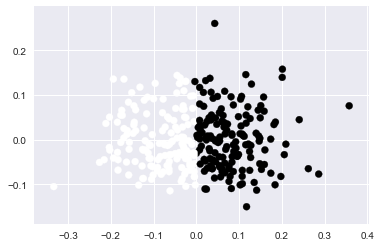

Comparing k-means clusters against the data:
col_0   0   1
row_0        
0      84  65
1      55  99


In [11]:
# Calculate predicted values.
y_pred = KMeans(n_clusters=2, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_pred)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y))

In [12]:
minibatchkmeans = MiniBatchKMeans(
    init='random',
    n_clusters=3,
    batch_size=200)
minibatchkmeans.fit(X_pca)

# Add the new predicted cluster memberships to the data frame.
predict_mini = minibatchkmeans.predict(X_pca)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(predict_mini, y_pred))

Comparing k-means and mini batch k-means solutions:
col_0    0   1
row_0         
0       13  69
1       24  85
2      112   0


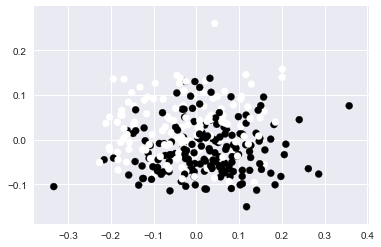

In [13]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=y)
plt.show()

In [24]:
km_mini = MiniBatchKMeans(init='random', n_clusters=2, batch_size=200)
km_mini.fit(X_norm)

MiniBatchKMeans(batch_size=200, compute_labels=True, init='random',
        init_size=None, max_iter=100, max_no_improvement=10, n_clusters=2,
        n_init=3, random_state=None, reassignment_ratio=0.01, tol=0.0,
        verbose=0)

In [25]:
y_hat = km_mini.predict(X)

# Check the MiniBatch model against our earlier one.
print('Comparing k-means and mini batch k-means solutions:')
print(pd.crosstab(y_hat, y))

Comparing k-means and mini batch k-means solutions:
col_0   0    1
row_0         
0      81   58
1      58  106


In [38]:
df.groupby(13).mean()

,0,1,2,3,4,5,6,7,8,9,10
13,,,,,,,,,,,
0,52.585366,0.560976,2.792683,129.250000,242.640244,0.140244,0.835366,158.378049,0.140244,0.586585,1.408537
1,55.381818,0.836364,3.345455,133.254545,249.109091,0.072727,1.163636,145.927273,0.454545,1.005455,1.636364
2,58.027778,0.805556,3.750000,134.194444,259.277778,0.250000,0.916667,135.583333,0.611111,1.780556,1.888889
3,56.000000,0.800000,3.771429,135.457143,246.457143,0.228571,1.285714,132.057143,0.657143,1.962857,1.971429
4,59.692308,0.846154,3.692308,138.769231,253.384615,0.076923,1.615385,140.615385,0.461538,2.361538,2.076923


In [40]:
y_full = df.iloc[:, 13]

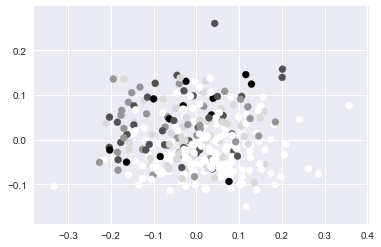

Comparing k-means clusters against the data:
13      0   1   2   3  4
row_0                   
0      21   5   5   3  2
1      12   9  13  11  3
2      58   7   2   3  2
3      45  18   8   7  1
4      28  16   8  11  5


In [46]:
sns.set_style('darkgrid')
# Calculate predicted values.
y_pred = KMeans(n_clusters=5, random_state=42).fit_predict(X_pca)

# Plot the solution.
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_full)
plt.show()

# Check the solution against the data.
print('Comparing k-means clusters against the data:')
print(pd.crosstab(y_pred, y_full))